In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


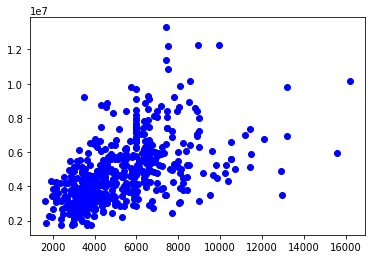

In [60]:
plt.scatter(data.area,data.price,color='blue')

In [21]:
df=data.drop(['price','hotwaterheating','airconditioning','guestroom'],axis='columns')
df

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,2,yes,furnished
1,8960,4,4,4,yes,no,3,no,furnished
2,9960,3,2,2,yes,yes,2,yes,semi-furnished
3,7500,4,2,2,yes,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,yes,2,no,unfurnished
541,2400,3,1,1,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,0,no,unfurnished
543,2910,3,1,1,no,no,0,no,furnished


In [35]:
df1=pd.get_dummies(df.mainroad,prefix="mainrood")
df1

,mainrood_no,mainrood_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
540,0,1
541,1,0
542,0,1
543,1,0


In [36]:
df2=pd.get_dummies(df.basement,prefix="basement")
df2

,basement_no,basement_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
540,0,1
541,1,0
542,1,0
543,1,0


In [37]:
df3=pd.get_dummies(df.prefarea,prefix="prefere area")
df3

,prefere area_no,prefere area_yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
540,1,0
541,1,0
542,1,0
543,1,0


In [38]:
df4=pd.get_dummies(df.furnishingstatus,prefix="furnishingStatus")
df4

,furnishingStatus_furnished,furnishingStatus_semi-furnished,furnishingStatus_unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [41]:
final=pd.concat([df,df1],axis='columns')
final

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,prefarea,furnishingstatus,mainrood_no,mainrood_yes
0,7420,4,2,3,yes,no,2,yes,furnished,0,1
1,8960,4,4,4,yes,no,3,no,furnished,0,1
2,9960,3,2,2,yes,yes,2,yes,semi-furnished,0,1
3,7500,4,2,2,yes,yes,3,yes,furnished,0,1
4,7420,4,1,2,yes,yes,2,no,furnished,0,1
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,yes,2,no,unfurnished,0,1
541,2400,3,1,1,no,no,0,no,semi-furnished,1,0
542,3620,2,1,1,yes,no,0,no,unfurnished,0,1
543,2910,3,1,1,no,no,0,no,furnished,1,0


In [42]:
final=pd.concat([final,df2],axis='columns')
final

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,prefarea,furnishingstatus,mainrood_no,mainrood_yes,basement_no,basement_yes
0,7420,4,2,3,yes,no,2,yes,furnished,0,1,1,0
1,8960,4,4,4,yes,no,3,no,furnished,0,1,1,0
2,9960,3,2,2,yes,yes,2,yes,semi-furnished,0,1,0,1
3,7500,4,2,2,yes,yes,3,yes,furnished,0,1,0,1
4,7420,4,1,2,yes,yes,2,no,furnished,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,yes,2,no,unfurnished,0,1,0,1
541,2400,3,1,1,no,no,0,no,semi-furnished,1,0,1,0
542,3620,2,1,1,yes,no,0,no,unfurnished,0,1,1,0
543,2910,3,1,1,no,no,0,no,furnished,1,0,1,0


In [43]:
final=pd.concat([final,df3],axis='columns')
final

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,prefarea,furnishingstatus,mainrood_no,mainrood_yes,basement_no,basement_yes,prefere area_no,prefere area_yes
0,7420,4,2,3,yes,no,2,yes,furnished,0,1,1,0,0,1
1,8960,4,4,4,yes,no,3,no,furnished,0,1,1,0,1,0
2,9960,3,2,2,yes,yes,2,yes,semi-furnished,0,1,0,1,0,1
3,7500,4,2,2,yes,yes,3,yes,furnished,0,1,0,1,0,1
4,7420,4,1,2,yes,yes,2,no,furnished,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,yes,2,no,unfurnished,0,1,0,1,1,0
541,2400,3,1,1,no,no,0,no,semi-furnished,1,0,1,0,1,0
542,3620,2,1,1,yes,no,0,no,unfurnished,0,1,1,0,1,0
543,2910,3,1,1,no,no,0,no,furnished,1,0,1,0,1,0


In [44]:
final=pd.concat([final,df4],axis='columns')
final

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,prefarea,furnishingstatus,mainrood_no,mainrood_yes,basement_no,basement_yes,prefere area_no,prefere area_yes,furnishingStatus_furnished,furnishingStatus_semi-furnished,furnishingStatus_unfurnished
0,7420,4,2,3,yes,no,2,yes,furnished,0,1,1,0,0,1,1,0,0
1,8960,4,4,4,yes,no,3,no,furnished,0,1,1,0,1,0,1,0,0
2,9960,3,2,2,yes,yes,2,yes,semi-furnished,0,1,0,1,0,1,0,1,0
3,7500,4,2,2,yes,yes,3,yes,furnished,0,1,0,1,0,1,1,0,0
4,7420,4,1,2,yes,yes,2,no,furnished,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,yes,2,no,unfurnished,0,1,0,1,1,0,0,0,1
541,2400,3,1,1,no,no,0,no,semi-furnished,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,yes,no,0,no,unfurnished,0,1,1,0,1,0,0,0,1
543,2910,3,1,1,no,no,0,no,furnished,1,0,1,0,1,0,1,0,0


In [45]:
fd=final.drop(['mainroad','basement','prefarea','furnishingstatus'],axis='columns')
fd

,area,bedrooms,bathrooms,stories,parking,mainrood_no,mainrood_yes,basement_no,basement_yes,prefere area_no,prefere area_yes,furnishingStatus_furnished,furnishingStatus_semi-furnished,furnishingStatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0
2,9960,3,2,2,2,0,1,0,1,0,1,0,1,0
3,7500,4,2,2,3,0,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,0,1,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,0


In [46]:
x=fd
x

,area,bedrooms,bathrooms,stories,parking,mainrood_no,mainrood_yes,basement_no,basement_yes,prefere area_no,prefere area_yes,furnishingStatus_furnished,furnishingStatus_semi-furnished,furnishingStatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0
2,9960,3,2,2,2,0,1,0,1,0,1,0,1,0
3,7500,4,2,2,3,0,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,0,1,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,0


In [47]:
y=data.price
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [51]:
x_train

,area,bedrooms,bathrooms,stories,parking,mainrood_no,mainrood_yes,basement_no,basement_yes,prefere area_no,prefere area_yes,furnishingStatus_furnished,furnishingStatus_semi-furnished,furnishingStatus_unfurnished
443,4320,3,1,1,1,1,0,1,0,1,0,0,0,1
323,5400,3,1,1,3,0,1,1,0,1,0,0,1,0
157,2817,4,2,2,1,1,0,0,1,1,0,1,0,0
231,4320,3,1,1,0,0,1,1,0,0,1,0,1,0
351,3600,2,1,1,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,3600,2,1,1,0,0,1,1,0,1,0,1,0,0
320,4320,3,1,2,2,0,1,1,0,0,1,1,0,0
527,1836,2,1,1,0,1,0,0,1,1,0,0,1,0
125,15600,3,1,1,2,0,1,1,0,1,0,0,1,0


In [52]:
model=LinearRegression()

In [53]:
model.fit(x_train,y_train)

LinearRegression()

In [54]:
model.predict(x_test)

array([ 2866887.34954734,  4084258.0586131 ,  6513619.59452855,
        4068985.96965689,  7465439.28259903,  7328501.19095968,
        3795606.53132323,  3312565.91177588,  5066131.03150275,
        2264694.76012167,  4274018.68950187,  2240722.31703554,
        4620129.17915465,  3980994.75170444,  6109205.77042115,
        2758868.16556156,  6970058.51155694,  5778880.88908611,
        5797168.50258668,  4763374.84484053,  2647749.55061045,
        2036251.47894788,  6400088.5277426 ,  4794805.89677757,
        5974729.74013789,  5372835.02951052,  3879299.81236209,
        4021540.41636622,  3819819.15843608,  4103776.39692048,
        4738533.03851691,  5293948.65186107,  6061562.5945293 ,
        6068059.49219418,  7271043.28418061,  5256498.84009198,
        5774824.07391068,  2457024.26184985,  5391118.68539537,
        4940848.69900802,  4405547.15106365,  5795657.76635327,
        3063803.1701908 ,  5894861.18273643,  5979469.80539339,
        7561784.66736533,  9241475.59040

In [66]:
model.score(x_test,y_test)

0.7066487793221383

In [67]:
model.predict([[3150,3,1,2,0,1,0,1,0,1,0,0,0,1]])

array([2866887.34954734])